In [1]:
import sys
if "../.." not in sys.path: sys.path.insert(0, "../..")
if ".." not in sys.path: sys.path.insert(0, "..")

import numpy as np
import matplotlib.pyplot as plt

from experiment.v1dd_client import V1DDClient
from experiment.v1dd_ophys_session import V1DDOPhysSession

%load_ext autoreload
%autoreload 2

In [2]:
# windows
# base_folder = r"\\allen\programs\mindscope\workgroups\surround\v1dd_in_vivo_new_segmentation\data"

# # linux and mac
# base_folder = "/allen/programs/mindscope/workgroups/surround/v1dd_in_vivo_new_segmentation/data"
# base_folder = "/Volumes/programs/mindscope/workgroups/surround/v1dd_in_vivo_new_segmentation/data"
base_folder = "/Users/chase/Desktop/test_v1dd_data"
# base_folder = "/Volumes/AllenDrive/v1dd/data" # Chase's external hard drive
client = V1DDClient(base_folder)

In [3]:
mouse = 409828
col = 1
vol = 3

In [4]:
sess = client.load_ophys_session(mouse=mouse, column=col, volume=vol)
print(f"Loaded ophys session {sess.get_session_id()} (mouse {sess.get_mouse_id()}, column {sess.get_column_id()}, volume {sess.get_volume_id()})")

Loaded ophys session M409828_13 (mouse 409828, column 1, volume 3)


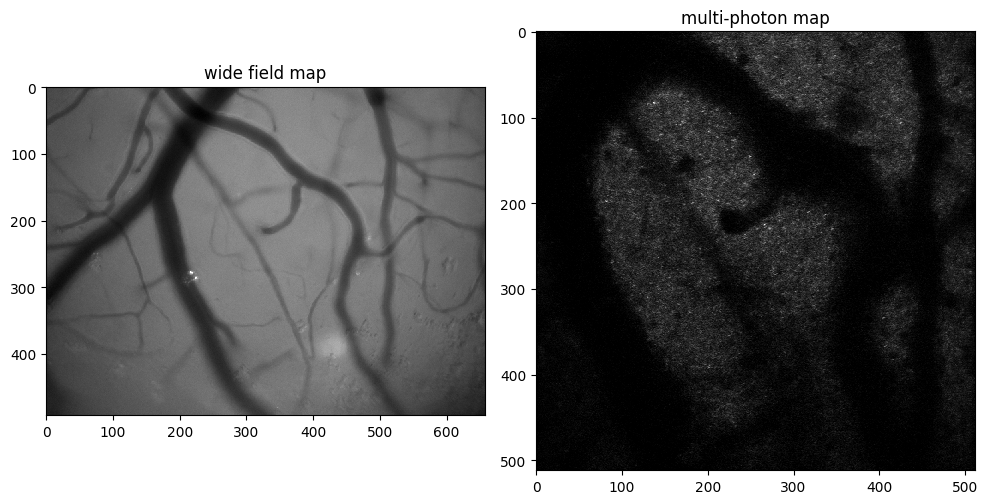

In [5]:
vasmap_wf = sess.get_vasculature_map(type='wf', is_standard=False)
vasmap_mp = sess.get_vasculature_map(type='mp', is_standard=False)

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10, 5))
axs[0].imshow(vasmap_wf, cmap='gray', interpolation='nearest')
axs[0].set_title('wide field map')
axs[1].imshow(vasmap_mp, cmap='gray', interpolation='nearest')
axs[1].set_title('multi-photon map')
fig.tight_layout()

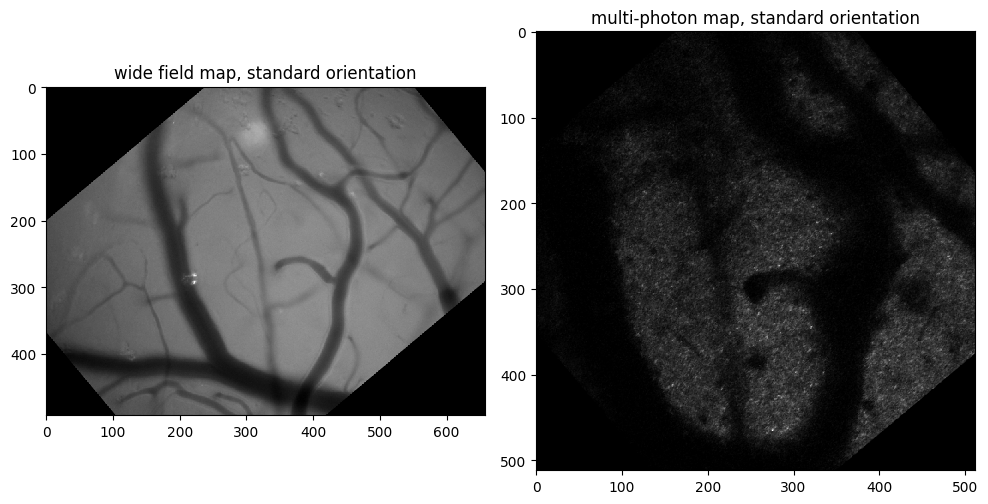

In [6]:
vasmap_wf = sess.get_vasculature_map(type='wf', is_standard=True)
vasmap_mp = sess.get_vasculature_map(type='mp', is_standard=True)

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10, 5))
axs[0].imshow(vasmap_wf, cmap='gray', interpolation='nearest')
axs[0].set_title('wide field map, standard orientation')
axs[1].imshow(vasmap_mp, cmap='gray', interpolation='nearest')
axs[1].set_title('multi-photon map, standard orientation')
fig.tight_layout()

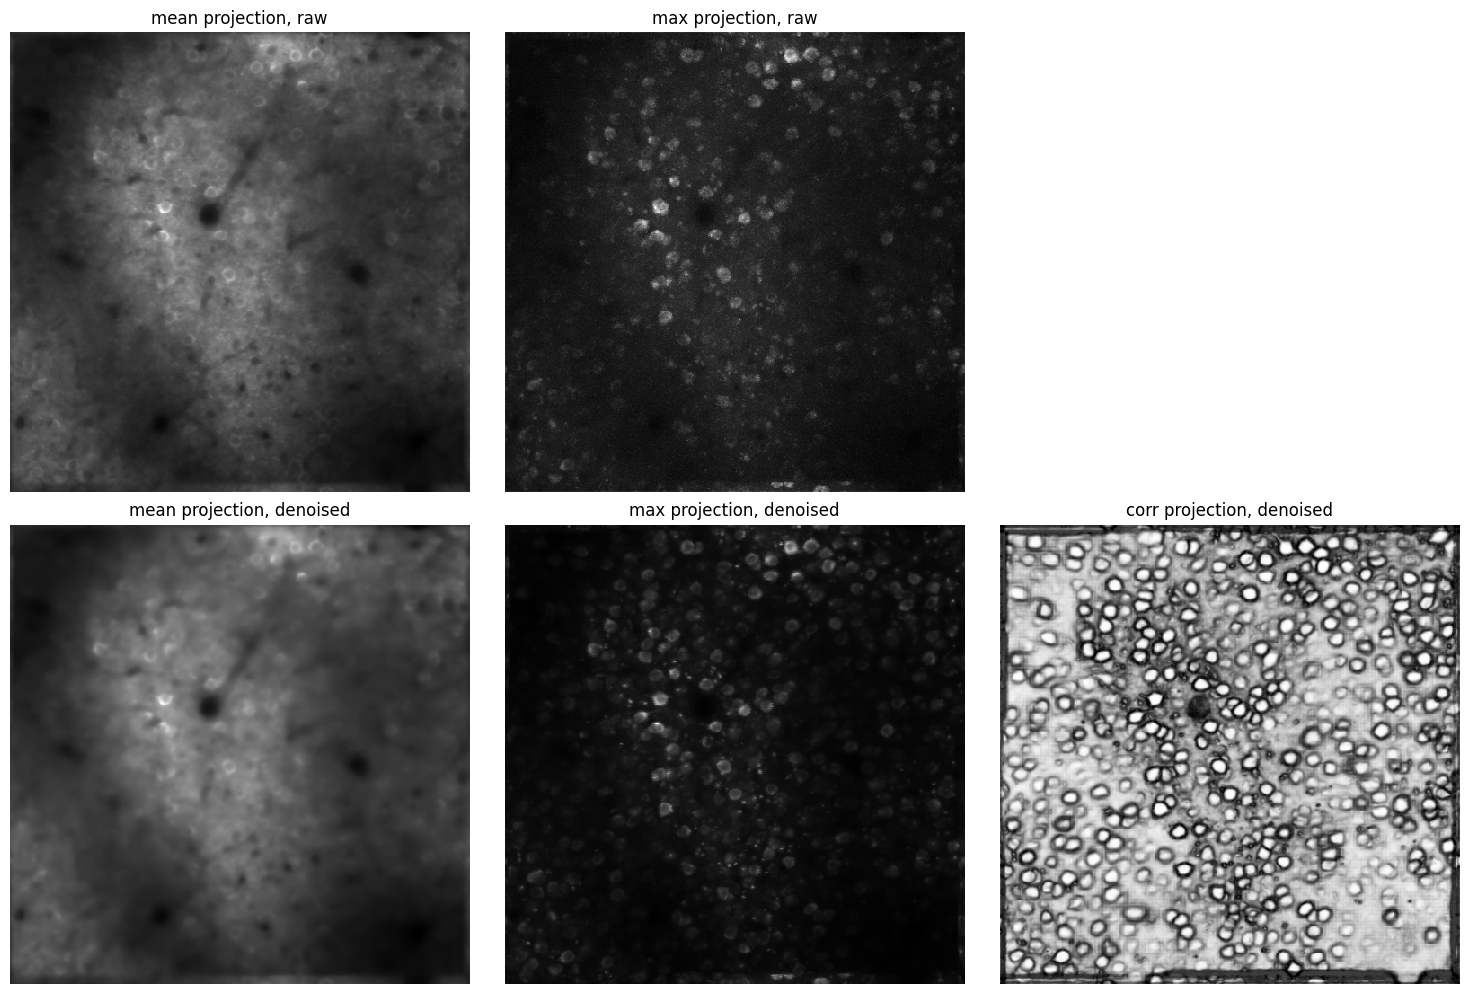

In [9]:
proj_raw_mean, proj_raw_max, proj_de_mean, proj_de_max, proj_de_corr = sess.get_plane_projection_images(1)

fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(15, 10))
axs[0, 0].imshow(proj_raw_mean, cmap='gray', interpolation='nearest')
axs[0, 0].set_title('mean projection, raw')
axs[0, 1].imshow(proj_raw_max, cmap='gray', interpolation='nearest')
axs[0, 1].set_title('max projection, raw')
axs[1, 0].imshow(proj_de_mean, cmap='gray', interpolation='nearest')
axs[1, 0].set_title('mean projection, denoised')
axs[1, 1].imshow(proj_de_max, cmap='gray', interpolation='nearest')
axs[1, 1].set_title('max projection, denoised')
axs[1, 2].imshow(proj_de_corr, cmap='gray', interpolation='nearest')
axs[1, 2].set_title('corr projection, denoised')

for ax in axs.flat:
    ax.set_axis_off()

fig.tight_layout()

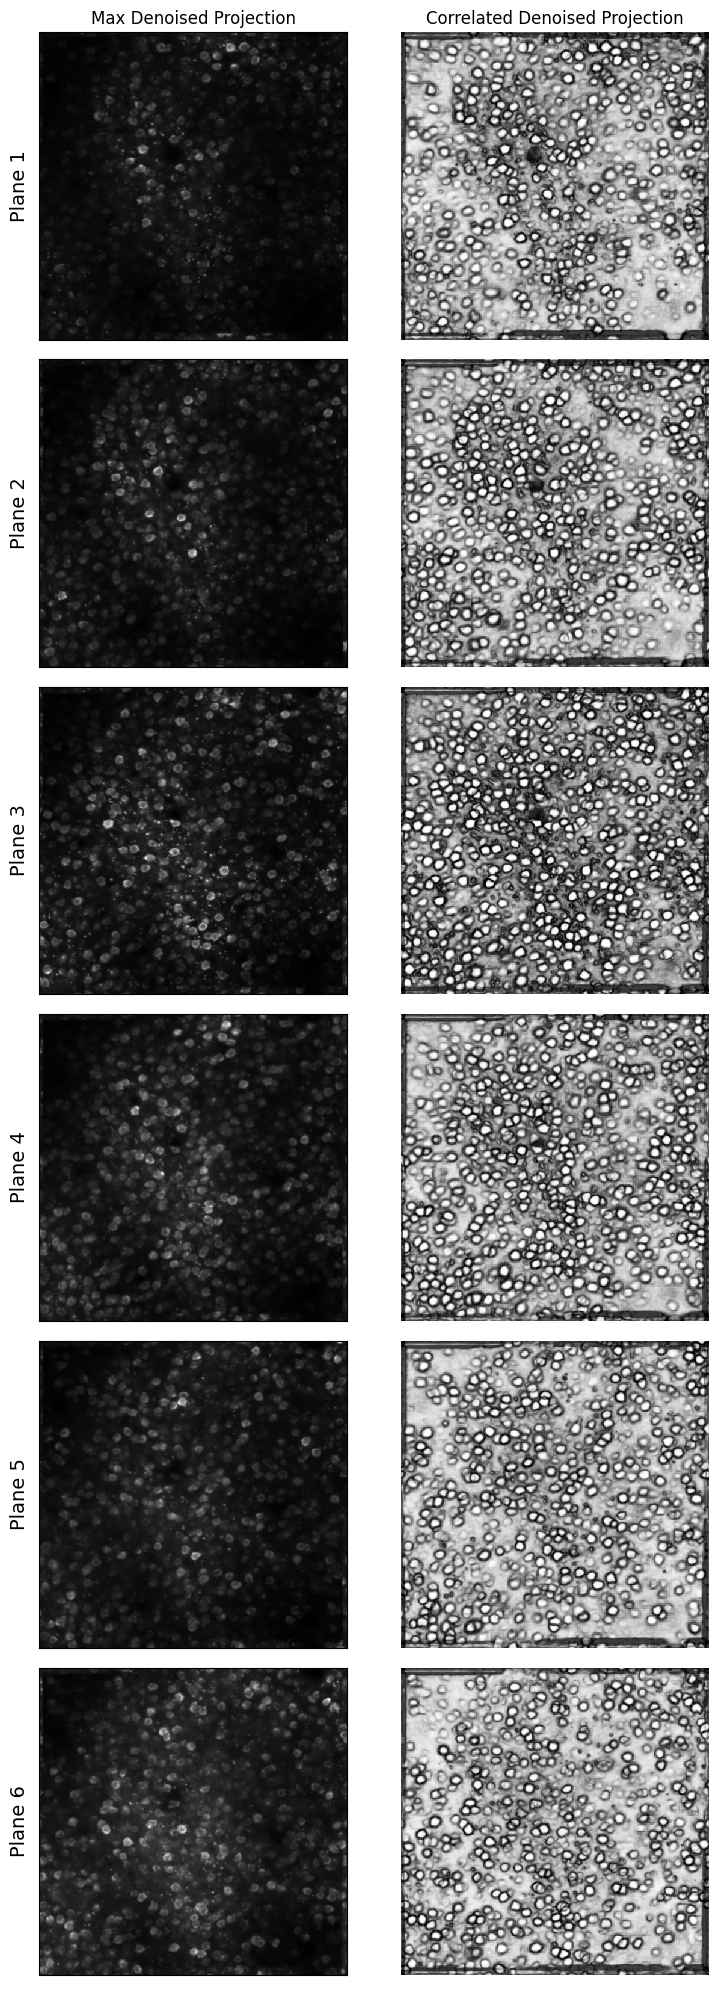

In [26]:
fig, axs = plt.subplots(nrows=len(sess.get_planes()), ncols=2, figsize=(8, 20))

for plane in sess.get_planes():
    proj_raw_mean, proj_raw_max, proj_de_mean, proj_de_max, proj_de_corr = sess.get_plane_projection_images(plane)

    ax = axs[plane-1, 0]
    ax.imshow(proj_de_max, cmap="gray", interpolation="nearest")
    if plane == 1:
        ax.set_title("Max Denoised Projection")
    ax.set_ylabel(f"Plane {plane}", fontsize=14)
    ax.xaxis.set_visible(False)
    ax.set_yticks([])

    ax = axs[plane-1, 1]
    ax.imshow(proj_de_corr, cmap="gray", interpolation="nearest")
    if plane == 1:
        ax.set_title("Correlated Denoised Projection")
    ax.set_axis_off()

fig.tight_layout()

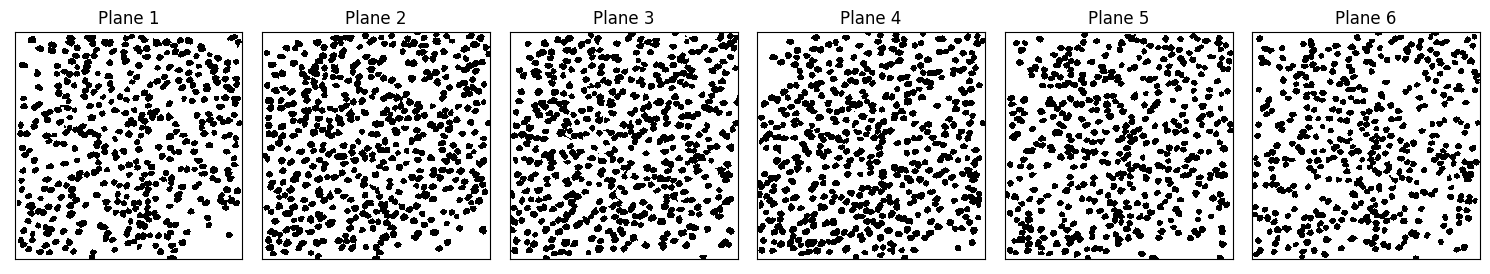

In [38]:
fig, axs = plt.subplots(ncols=len(sess.get_planes()), figsize=(15, 4))

for plane in sess.get_planes():
    valid_roi_image_mask = None
    
    for roi in sess.get_rois(plane):
        if sess.is_roi_valid(plane, roi):
            mask = sess.get_roi_image_mask(plane, roi)
            valid_roi_image_mask = mask if valid_roi_image_mask is None else np.logical_or(valid_roi_image_mask, mask)

    ax = axs[plane-1]
    ax.imshow(~valid_roi_image_mask, cmap="gray", interpolation="nearest")
    # ax.set_axis_off()
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"Plane {plane}", fontsize=12)

fig.tight_layout()